***
# Statistics course - Part 1
***

In [1]:
import pandas as pd

# Reading dataset
dados = pd.read_csv("dados.csv")

## 2 Frequency distribution
***

The first step in an analysis work is the knowledge of the behavior of the variables involved in the study. Using statistical techniques such as the analysis of the **frequency distributions** and the **histograms** we can better evaluate the way the phenomena under study are distributed.

### 2.1 Frequency distribution for qualitative variable 
***

### Method 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [2]:
# "Sexo" (gender in english) variable absolute distribuition
gender_absolute = dados.Sexo.value_counts()
gender_absolute

0    53250
1    23590
Name: Sexo, dtype: int64

In [3]:
# "Sexo" (gender in english) variable percentage distribuition
gender_percentage = dados.Sexo.value_counts(normalize=True)
gender_percentage

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [4]:
# Joining two distribution
qualitative_frequency = pd.DataFrame({'Frequency': gender_absolute, 'Percentage': gender_percentage})
qualitative_frequency

,Frequency,Percentage
0,53250,0.692998
1,23590,0.307002


In [5]:
# Rename index
qualitative_frequency.rename(index = {0: 'Masculine', 1: 'Feminine'}, inplace = True)
qualitative_frequency

,Frequency,Percentage
Masculine,53250,0.692998
Feminine,23590,0.307002


### Method 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [6]:
gender = {
    0: 'Masculine',
    1: 'Feminine'
}

skin_color = {
    0: 'Indigenous',
    2: 'White',
    4: 'Black',
    6: 'Yellow',
    8: 'Brown-skinned',
    9: 'No declaration'
}

In [7]:
frequency = pd.crosstab(dados.Sexo, dados.Cor)
frequency

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [8]:
# Rename columns
frequency.rename(columns=skin_color, inplace=True)
frequency

Cor,Indigenous,White,Black,Yellow,Brown-skinned
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [9]:
# Rename index
frequency.rename(index=gender, inplace=True)
frequency

Cor,Indigenous,White,Black,Yellow,Brown-skinned
Sexo,,,,,
Masculine,256,22194,5502,235,25063
Feminine,101,9621,2889,117,10862


In [10]:
# Generating percentual values
percentage = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)
percentage.rename(index=gender, inplace=True)
percentage.rename(columns=skin_color, inplace=True)
percentage

Cor,Indigenous,White,Black,Yellow,Brown-skinned
Sexo,,,,,
Masculine,0.003332,0.288834,0.071603,0.003058,0.326171
Feminine,0.001314,0.125208,0.037598,0.001523,0.141359


Same view, but using variable `income` (Renda) and calculating his mean

In [11]:
income = pd.crosstab(
    dados.Sexo, 
    dados.Cor, 
    aggfunc='mean',
    values=dados.Renda
)
income.rename(index=gender, inplace=True)
income.rename(columns=skin_color, inplace=True)
income

Cor,Indigenous,White,Black,Yellow,Brown-skinned
Sexo,,,,,
Masculine,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminine,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### 2.2 Frequency distribution for quantitative variables (custom classes)
***

### Step 1 - Specify the boundaries of each class

Use the following classification:

<b>A</b> ► Over 20 minimum wage

<b>B</b> ► Between 10 and 20 minimum wage

<b>C</b> ► Between 4 and 10 minimum wage

<b>D</b> ► Between 2 and 4 minimum wage

<b>E</b> ► Up to 2 minimum wage


The minimum wage in 2015 was **R$ 788.00**. The classes value in R\$ are:


<b>A</b> ► Over 15,760

<b>B</b> ► Between 7,880 and 15,760

<b>C</b> ► Between 3,152 and 7,880

<b>D</b> ► Between 1.576 and 3,152

<b>E</b> ► Up to 1,576


First look at `income` (Renda) variable

In [12]:
f"Minimum value: {dados.Renda.min()}"

'Minimum value: 0'

In [13]:
f"Maximum value: {dados.Renda.max()}"

'Maximum value: 200000'

`classes` and `labels` will be used in following pandas `cut` function

In [14]:
# values of income classes
classes = [
    0,     # minimum
    1576,  # E and D classes
    3152,  # D and C classes
    7880,  # C and B classes
    15760, # A and B classes
    200000 # maximum
]

# classes labels
labels = ['E', 'D', 'C', 'B', 'A']

### Step 2 - Create a frequency table

Using pandas `cut` function

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [15]:
# Filling the label classes
min_wage_classes = pd.cut(
                        x=dados.Renda, 
                        bins=classes,
                        labels=labels,
                        include_lowest=True # to include the minimum value of classes variable
                    )
min_wage_classes

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): [E < D < C < B < A]

In [16]:
# Frequency by classes
frequency_table = pd.value_counts(min_wage_classes)
frequency_table

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [17]:
# Percentage by class
percentage_table = pd.value_counts(min_wage_classes, normalize=True)
percentage_table

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [18]:
# Joining two tables
classes_df = pd.DataFrame(
    {'Frequency': frequency_table, 'Percentage': percentage_table}
)
classes_df.index.names = ['Classes']
classes_df.sort_index(ascending=False, inplace=True)
classes_df

,Frequency,Percentage
Classes,,
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


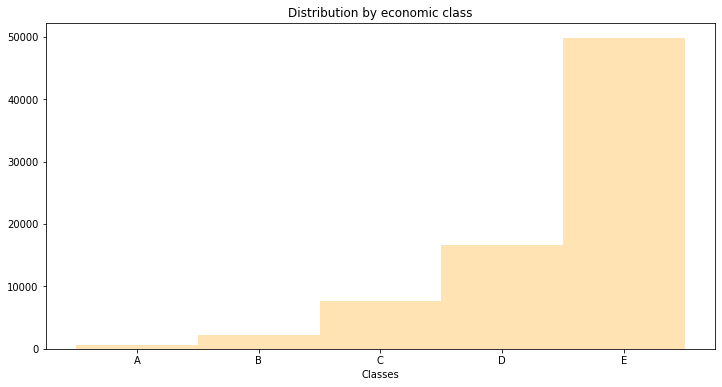

In [42]:
# Plotting in chart
fig = classes_df.Frequency.plot.bar(
    width=1, 
    color='orange', 
    alpha=0.3, 
    figsize=(12,6),
    title='Distribution by economic class'
)
fig.set_xticklabels(fig.get_xticklabels(), rotation=0)
fig

### 2.3 Frequency distribution for quantitative variable (fixed amplitude classes)
***

### Used library

http://www.numpy.org/

In [19]:
import numpy as np

### Step 1 - Defining classes quantities
To create classes groups (labels) when a predefined rule non exists.

#### Sturges formula

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [20]:
n = dados.shape[0]

In [21]:
# Applying the formula
k = 1 + (10 / 3) * np.log10(n)
print(f"{round(k)} classes to be created")

17.0 classes to be created


### Step 2 - Create a frequency table

In [22]:
# fixed amplitude (all classes are the same size)
min_wage_fixed_classes = pd.cut(
                        x=dados.Renda, 
                        bins=k,
                        include_lowest=True # include min value
                    )
min_wage_fixed_classes

0        (-200.001, 11764.706]
1        (-200.001, 11764.706]
2        (-200.001, 11764.706]
3        (-200.001, 11764.706]
4        (-200.001, 11764.706]
                 ...          
76835    (-200.001, 11764.706]
76836    (-200.001, 11764.706]
76837    (-200.001, 11764.706]
76838    (-200.001, 11764.706]
76839    (-200.001, 11764.706]
Name: Renda, Length: 76840, dtype: category
Categories (17, interval[float64]): [(-200.001, 11764.706] < (11764.706, 23529.412] < (23529.412, 35294.118] < (35294.118, 47058.824] ... (152941.176, 164705.882] < (164705.882, 176470.588] < (176470.588, 188235.294] < (188235.294, 200000.0]]

In [23]:
# Sort by label, not by frequency
fixed_frequency = pd.value_counts(min_wage_fixed_classes, sort=False)
fixed_frequency

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [24]:
fixed_percentage = pd.value_counts(min_wage_fixed_classes, sort=False, normalize=True)
fixed_percentage

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [25]:
# Creating table
fixed_classes_df = pd.DataFrame(
    {'Frequency': fixed_frequency, 'Percentage': fixed_percentage}
)
fixed_classes_df.index.names = ['Classes']
# classes_fixa_df.sort_index(ascending=False, inplace=True)
fixed_classes_df

,Frequency,Percentage
Classes,,
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078


### 2.4 Histogram
***
The <b>HISTOGRAM</b> is the chart representation from a frequency distribution. Its a chart formed by a set of side by side retangles, where the area of each retangle is proportional to the class frequency represents.

### Used library

https://seaborn.pydata.org/

In [26]:
import seaborn as sns

Text(0.5, 0, 'Height in meters')

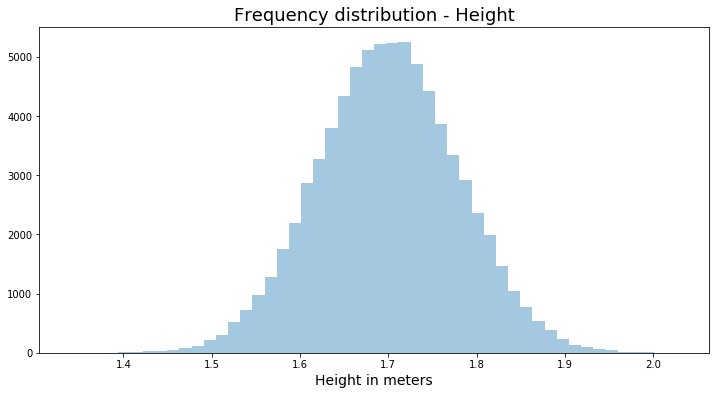

In [27]:
# Plotting the histogram

ax = sns.distplot(dados.Altura, kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribution - Height', fontsize=18)
ax.set_xlabel('Height in meters', fontsize=14)

The **KDE** parameter is a density function. See below with this parameter `True`

Note that y axis change according kde parameter:
- When `kde=False` y axis shows the frequency of watched variable
- When `kde=True` y axis shows a kde density measure (*see more in this [stack overflow](https://stackoverflow.com/questions/51666784/what-is-y-axis-in-seaborn-distplot?answertab=votes#tab-top)*)

Text(0.5, 0, 'Height in meters')

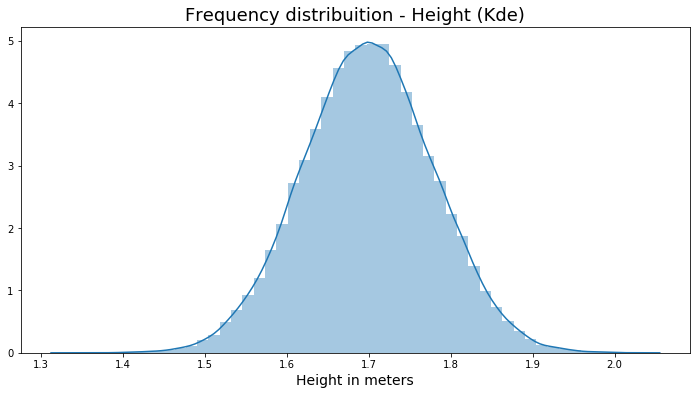

In [29]:
# with defaul kde parameter (True)
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribuition - Height (Kde)', fontsize=18)
ax.set_xlabel('Height in meters', fontsize=14)